<b><h2><u>Data Description:</u></h2></b><br>
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
<b><h2><u>Domain:</u></h2></b><br>
Banking
<b><h2><u>Context:</u></h2></b><br>
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.<br>
<b><h2><u>Objective:</u></h2></b><br>
The classification goal is to predict the likelihood of a liability customer buying personal loans.

<b><h3>Library imports

In [478]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as stats
import numpy as np
from pandas.api.types import is_numeric_dtype
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from seaborn_qqplot import QQPlot
from matplotlib import pyplot as plt
from scipy.stats import gamma
from sklearn.preprocessing import StandardScaler
sns.set(color_codes=True)
%matplotlib inline

<b><h3>Importing the data

In [364]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [365]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<b><h3>Exploratory Data Analysis

<b><h4>Data types</h4></b>

In [366]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [367]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<b>Continous Variables:</b><li>Age : Customer's age in completed years</li><li>Experience : #years of professional experience</li><li>Income : Annual income of the customer (dollars 000) </li><li>CCAvg : Avg. spending on credit cards per month (dollars 000)</li><li>Mortgage : Value of house mortgage if any (dollars 000)</li><br>
<b>Binary Categorical Variables:</b><li>Personal Loan : Did this customer accept the personal loan offered in
the last campaign? </li><li>Securities Account : Does the customer have a securities account with
the bank?</li><li>CD Account : Does the customer have a certificate of deposit (CD)
account with the bank?</li><li>Online : Does the customer use internet banking facilities?</li><li>CreditCard : Does the customer use a credit card issued by
UniversalBank?</li><br>
<b>Ordinal Categorical Variables:</b><li>Family : Family size of the customer</li><li>Education : Education Level</li><br>
<b>Nominal Categorical Variables:</b><li>ZIP Code : Home Address ZIP code</li><br>

<b>Looking for Null Values

In [368]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [369]:
df.isnull().values.any()

False

In [370]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<b>Observation:</b> We do not have any missing values hence we do not need to impute

<b>Looking for negative values in dataset

In [371]:
for cols in df.columns.to_list():
    print("{} - {}".format(cols,df[df[cols]<0].values.any()))

ID - False
Age - False
Experience - True
Income - False
ZIP Code - False
Family - False
CCAvg - False
Education - False
Mortgage - False
Personal Loan - False
Securities Account - False
CD Account - False
Online - False
CreditCard - False


<b>Observations:</b>We can see that experience has negative values but we know that experience cannot be negative . It can either be zero or 1.

<b>Imputing negative experience values with median</b>

In [372]:
exp_med = df['Experience'].median()
df['Experience'] = df['Experience'].apply(lambda x : exp_med if x < 0 else x)

In [373]:
df[df['Experience']<0].values.any()

False

<b>Unique Values</b>

In [374]:
df.shape

(5000, 14)

In [375]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<b><h3>Python Class definition for EDA

In [376]:
class Eda:
    
    def __init__(self, series, var, color):
        self.series = series
        self.var = var
        self.color = color
    
    def Distribution_Continous_Variables(self):
        plt.figure(figsize=(10, 5))
        sns.distplot(self.series, color = self.color).set_title('Distribution of {} in the Dataset'.format(self.var))
        
    def Calculate_Summary(self):
        print('Count = {1}'.format(self.var,len(self.series)))
        print('Mean of {0} = {1}'.format(self.var,self.series.mean()))
        print('Median of {0} = {1}'.format(self.var,self.series.median()))
        print('Mode of {0} = {1}'.format(self.var,self.series.mode().values[0]))
        print('Skewness of {0} = {1}'.format(self.var, self.series.skew()))
        print('Excess Kurtosis of {0} = {1}'.format(self.var, self.series.kurtosis()))
    
    def BoxPlot(self,**kwargs):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x = kwargs['x'], \
                    y = kwargs['y'], \
                    data = kwargs['data'], \
                    color = self.color, \
                    hue = kwargs['hue']).set_title('Boxplot of {}'.format(self.var))
    
    def ViolinPlot(self,**kwargs):
        plt.figure(figsize=(10, 5))
        sns.violinplot(x = kwargs['x'], \
                    y = kwargs['y'], \
                    data = kwargs['data'], \
                    color = self.color, \
                    hue = kwargs['hue']).set_title('Violin Plot of {}'.format(self.var))
        
    def CountPlot(self, **kwargs):
        plt.figure(figsize=(10, 5))
        sns.countplot(y=kwargs['y'], \
                      hue=kwargs['hue'], \
                      data=kwargs['data']).set_title('Count Plot of {}'.format(self.var))
        
    
    
    
        
        
        

<b><h3>Distribution of Continous variables

In [377]:
pl0 = df[df['Personal Loan'] == 0]
pl1 = df[df['Personal Loan'] == 1]

<b>Age

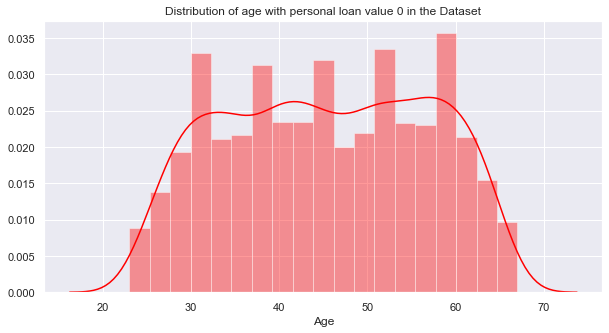

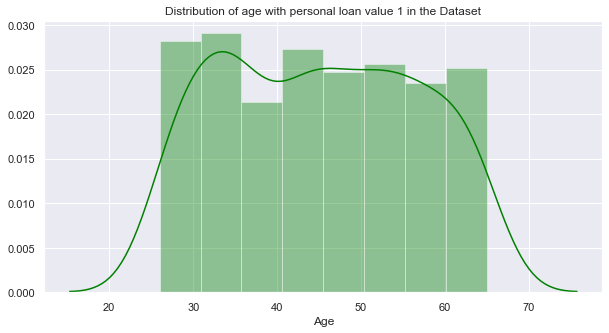

In [378]:
age0 = Eda(pl0['Age'],'age with personal loan value 0','red')
age0.Distribution_Continous_Variables()
#--------------------------------------------------------#
age1 = Eda(pl1['Age'],'age with personal loan value 1','green')
age1.Distribution_Continous_Variables()

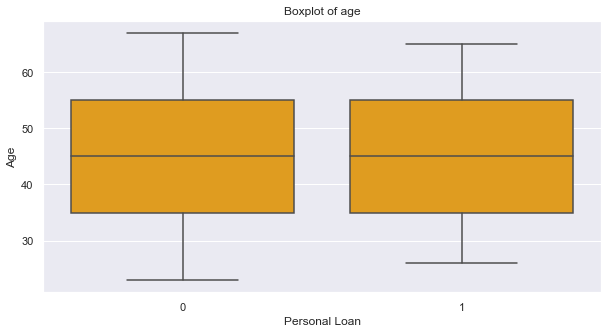

In [379]:
age = obj = Eda(df['Age'],'age','orange')
age.BoxPlot(x = "Personal Loan", y = 'Age', data = df, hue = None)

In [380]:
age0.Calculate_Summary()

Count = 4520
Mean of age with personal loan value 0 = 45.36725663716814
Median of age with personal loan value 0 = 45.0
Mode of age with personal loan value 0 = 35
Skewness of age with personal loan value 0 = -0.03817280589998792
Excess Kurtosis of age with personal loan value 0 = -1.1461574072694654


In [381]:
age1.Calculate_Summary()

Count = 480
Mean of age with personal loan value 1 = 45.06666666666667
Median of age with personal loan value 1 = 45.0
Mode of age with personal loan value 1 = 34
Skewness of age with personal loan value 1 = 0.052762889496975614
Excess Kurtosis of age with personal loan value 1 = -1.2091567277108584


<b>Observations:</b><br><li>Both the distributions are almost same but count of people who availed personal loan last campaign is less<li>From the above summary we may conclude that even though the skewness of the data is close to 0 but excess Kurtosis is less extreme than the 3 standard deviations of a normal distribution. Hence , we may conclude that this data is not normally distributed.<li>This may further be concluded with the fact that mean , median and mode are not equal.<li>The average age of customers is around 45 while the the count of customers with age 35 is maximum.

<b>Experience

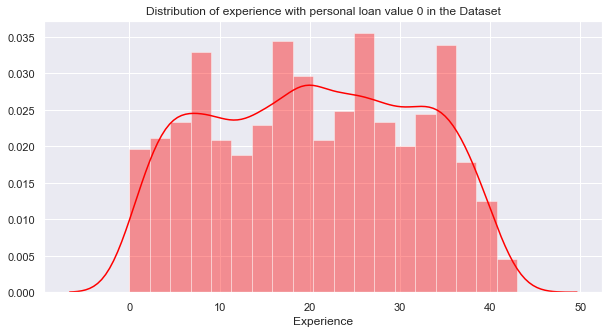

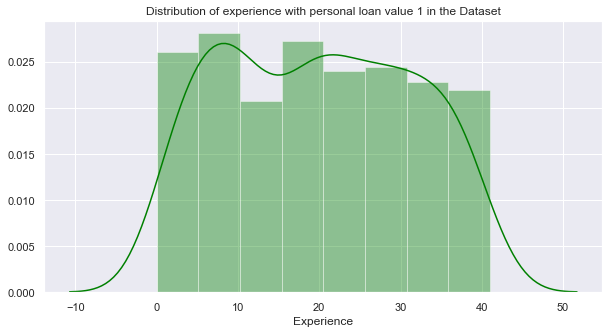

In [382]:
experience0 = Eda(pl0['Experience'],'experience with personal loan value 0','red')
experience0.Distribution_Continous_Variables()
#---------------------------------------------------#
experience1 = Eda(pl1['Experience'],'experience with personal loan value 1','green')
experience1.Distribution_Continous_Variables()

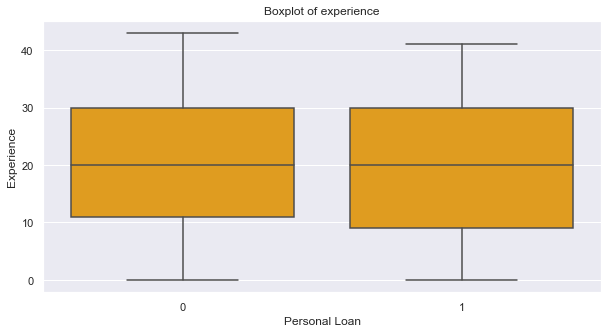

In [383]:
experience = Eda(df['Experience'],'experience','orange')
experience.BoxPlot(x = "Personal Loan", y = 'Experience', data = df, hue = None)

In [384]:
experience0.Calculate_Summary()

Count = 4520
Mean of experience with personal loan value 0 = 20.378982300884957
Median of experience with personal loan value 0 = 20.0
Mode of experience with personal loan value 0 = 20.0
Skewness of experience with personal loan value 0 = -0.020976979449583273
Excess Kurtosis of experience with personal loan value 0 = -1.1070950161947548


In [385]:
experience1.Calculate_Summary()

Count = 480
Mean of experience with personal loan value 1 = 19.84375
Median of experience with personal loan value 1 = 20.0
Mode of experience with personal loan value 1 = 9.0
Skewness of experience with personal loan value 1 = 0.05265179638997041
Excess Kurtosis of experience with personal loan value 1 = -1.1857504179640792


<b>Observations:</b><br><li>Both the distributions are almost same but count of people who availed personal loan last campaign is less.<li>No Outliers can be noticed here<li>From the above summary we may conclude that even though the skewness of the data is close to 0 but excess Kurtosis is less extreme than the 3 standard deviations of a normal distribution. Hence , we may conclude that this data is not normally distributed.<li>This may further be concluded with the fact that mean , median and mode are not equal.<li> The average age of customers is almost 20 while the count of customers with with age 32 is maximum in 1st Case while 9 is maximum in 2nd case.

<b>Income

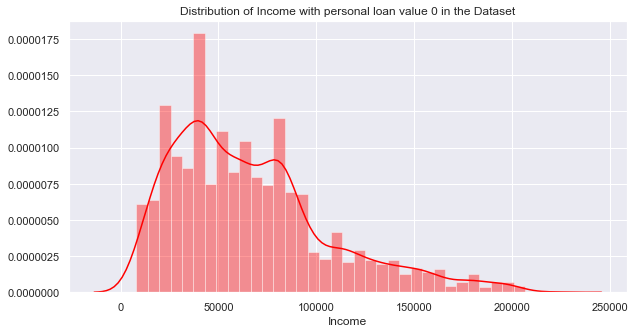

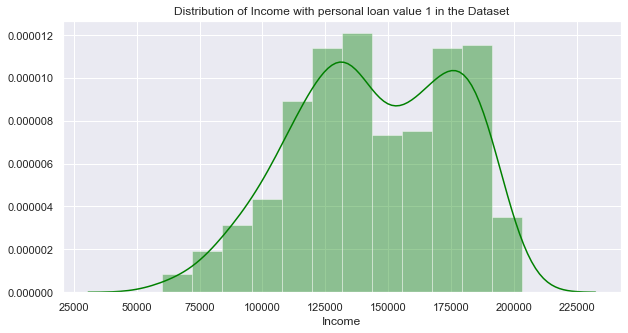

In [386]:
income0 = Eda(pl0['Income']*1000,'Income with personal loan value 0','red')
income0.Distribution_Continous_Variables()
#-----------------------------------------------------------------------------#
income1 = Eda(pl1['Income']*1000,'Income with personal loan value 1','green')
income1.Distribution_Continous_Variables()

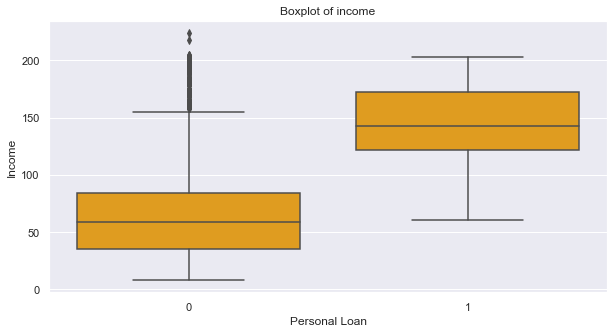

In [387]:
income = Eda(df['Income'],'income','orange')
income.BoxPlot(x = "Personal Loan", y = 'Income', data = df, hue = None)

In [388]:
income0.Calculate_Summary()

Count = 4520
Mean of Income with personal loan value 0 = 66237.38938053098
Median of Income with personal loan value 0 = 59000.0
Mode of Income with personal loan value 0 = 44000
Skewness of Income with personal loan value 0 = 1.029026298315474
Excess Kurtosis of Income with personal loan value 0 = 0.797101296016077


In [389]:
income1.Calculate_Summary()

Count = 480
Mean of Income with personal loan value 1 = 144745.83333333334
Median of Income with personal loan value 1 = 142500.0
Mode of Income with personal loan value 1 = 130000
Skewness of Income with personal loan value 1 = -0.23994856075824628
Excess Kurtosis of Income with personal loan value 1 = -0.8033220331647923


<b>Observations:</b><br><li>The distribution of data is different in both cases.<li>Mean of income of customers who availed personal loan during last campaign is higher but the overall count is low.<li>Both are not normally distributed.<li>The skewness in 1st case is 1 i.e is skewed to the right while in second case it is skewed slightly to the left. This indicates that the 1st case might have outliers which can be conculded by looking into boxplot

<b>CCAvg

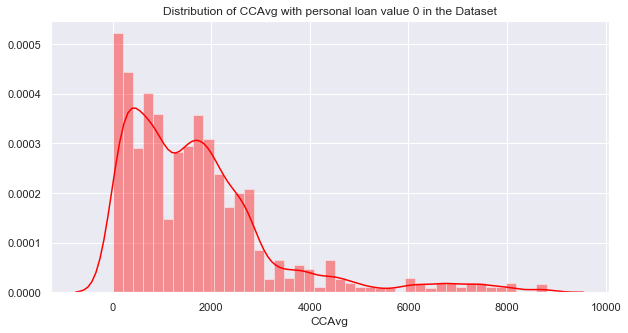

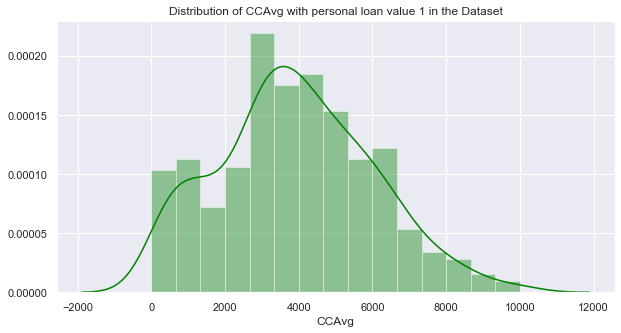

In [390]:
ccavg0 = Eda(pl0['CCAvg']*1000,'CCAvg with personal loan value 0','red')
ccavg0.Distribution_Continous_Variables()
#--------------------------------------------------------------------------#
ccavg1 = Eda(pl1['CCAvg']*1000,'CCAvg with personal loan value 1','green')
ccavg1.Distribution_Continous_Variables()

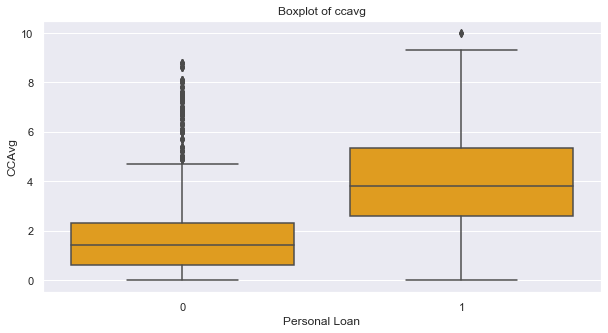

In [391]:
ccavg = Eda(df['CCAvg'],'ccavg','orange')
ccavg.BoxPlot(x = "Personal Loan", y = 'CCAvg', data = df, hue = None)

In [392]:
ccavg0.Calculate_Summary()

Count = 4520
Mean of CCAvg with personal loan value 0 = 1729.0088495575221
Median of CCAvg with personal loan value 0 = 1400.0
Mode of CCAvg with personal loan value 0 = 300.0
Skewness of CCAvg with personal loan value 0 = 1.8641025145848957
Excess Kurtosis of CCAvg with personal loan value 0 = 4.245553304847272


In [393]:
ccavg1.Calculate_Summary()

Count = 480
Mean of CCAvg with personal loan value 1 = 3905.3541666666665
Median of CCAvg with personal loan value 1 = 3800.0
Mode of CCAvg with personal loan value 1 = 3000.0
Skewness of CCAvg with personal loan value 1 = 0.25063873075909665
Excess Kurtosis of CCAvg with personal loan value 1 = -0.29713063291345776


<b>Observations:</b><br><li>Both the distributions are different.<li>Both have outliers as evident from the boxplots<li>In the 1st case dataset is skewed to the right while in the 2nd case the data is closer to normal distribution i.e most customers without personal loan tend to have average monthly expenditure on credit card below 3500 dollars<li>Cutomers who availed personal loan during last campaign have higher mean of credit card expenditure but the overall count is low.

<b>Mortgage

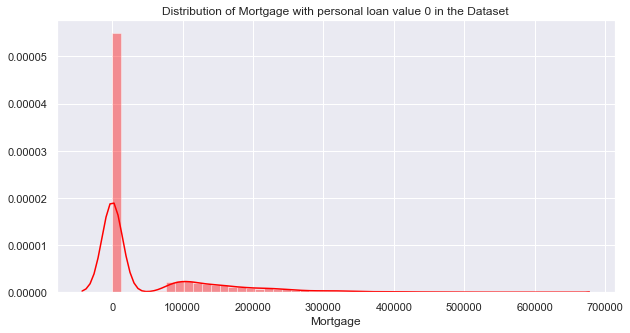

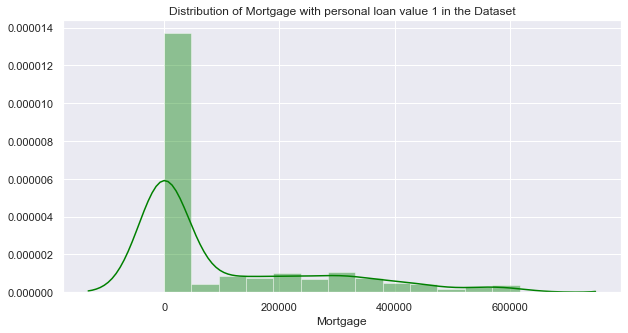

In [394]:
mortgage0 = Eda(pl0['Mortgage']*1000,'Mortgage with personal loan value 0','red')
mortgage0.Distribution_Continous_Variables()
#----------------------------------------------------------------#
mortgage1 = Eda(pl1['Mortgage']*1000,'Mortgage with personal loan value 1','green')
mortgage1.Distribution_Continous_Variables()

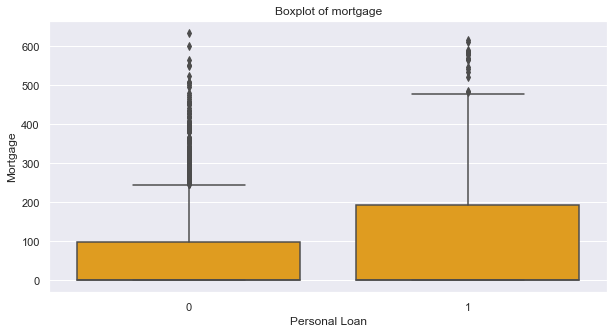

In [395]:
mortgage = Eda(df['Mortgage'],'mortgage','orange')
mortgage.BoxPlot(x = "Personal Loan", y = 'Mortgage', data = df, hue = None)

In [396]:
mortgage0.Calculate_Summary()

Count = 4520
Mean of Mortgage with personal loan value 0 = 51789.38053097345
Median of Mortgage with personal loan value 0 = 0.0
Mode of Mortgage with personal loan value 0 = 0
Skewness of Mortgage with personal loan value 0 = 1.996130847882783
Excess Kurtosis of Mortgage with personal loan value 0 = 4.221962911423503


In [397]:
mortgage1.Calculate_Summary()

Count = 480
Mean of Mortgage with personal loan value 1 = 100845.83333333333
Median of Mortgage with personal loan value 1 = 0.0
Mode of Mortgage with personal loan value 1 = 0
Skewness of Mortgage with personal loan value 1 = 1.4530275709489475
Excess Kurtosis of Mortgage with personal loan value 1 = 1.0060144309716295


<b>Observations:</b><br><li>The distribution seems to almost same in most cases with 1st case being slightly more right skewed than the 2nd case.<li>1st case has higher excess kurtosis which signifies that the distribution's tail goes beyond the three standard deviations of a typical normal distribution.<li>Both the distributions indicate the presence of outliers in Mortage feature

<b>Conclusion:</b> From above EDA of Continous variables we may conclude that Income,CCAvg for customers who did not avail personal loan during last campaign and Mortagage variables contain outliers which we will remove in data cleaning section

<b><h3>Count of Categorical Variables

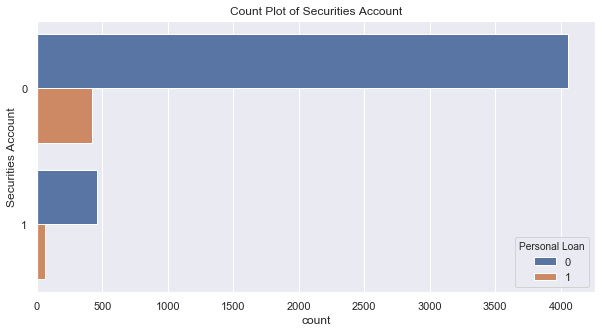

In [398]:
sec_accnt = Eda(df['Securities Account'],'Securities Account', color=None)
sec_accnt.CountPlot(y="Securities Account",hue = "Personal Loan", data = df)

<b>Observations:</b> Customers with Securities Account who availed personal loan in last campaign are lower in number than the customers who did not have the Securities Account.

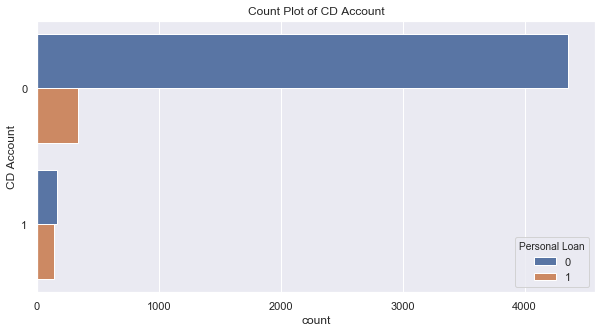

In [399]:
cd_accnt = Eda(df["CD Account"],"CD Account", color = None)
cd_accnt.CountPlot(y="CD Account",hue = "Personal Loan", data = df)

<b>Observations:</b> Customers with CD account who availed personal loan in last campaign are lower in number than the customers who did not have the CD account.

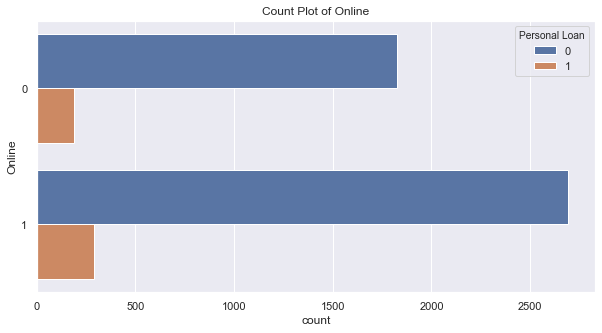

In [400]:
online = Eda(df["Online"],"Online", color = None)
online.CountPlot(y="Online",hue = "Personal Loan", data = df)

<b>Observations:</b> Customers using internet banking facilities who availed personal loan in last campaign are higher in number than the customers who did not have internet banking facilities.

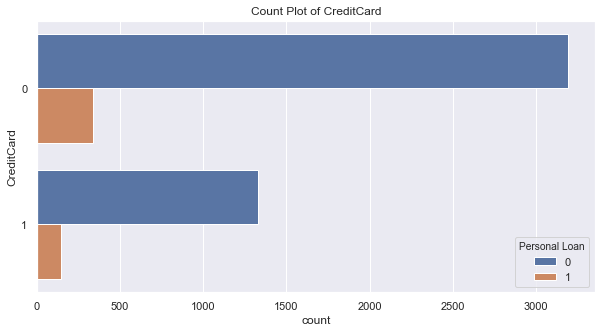

In [401]:
CreditCard = Eda(df["CreditCard"],"CreditCard", color = None)
CreditCard.CountPlot(y="CreditCard",hue = "Personal Loan", data = df)

<b>Observations:</b> Customers with credit card from universal bank who availed personal loan in last campaign are lower in number than the customers who did not have credit card from universal bank.

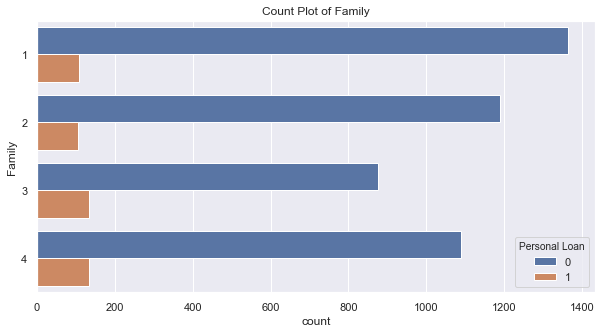

In [402]:
family = Eda(df["Family"],"Family", color = None)
family.CountPlot(y="Family",hue = "Personal Loan", data = df)

<b>Observations:</b> Customers with number of family members more than 3 who availed personal loan in last campaign are higher in number than the customers who have number of family members lower than 3.

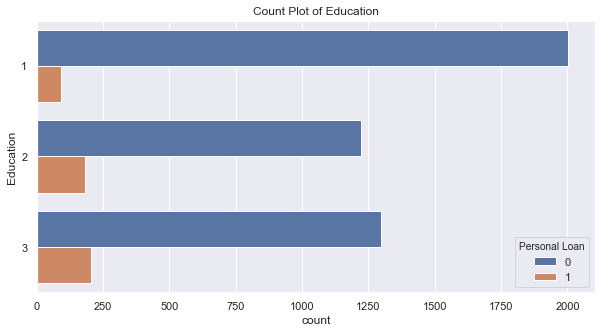

In [403]:
education = Eda(df["Education"],"Education", color = None)
education.CountPlot(y="Education",hue = "Personal Loan", data = df)

<b>Observations:</b> From above we can observe that higher the education level of the customer, more is their possibility of availing personal loan.

<b><h3>Pair Plot with Personal Loan as hue</b>

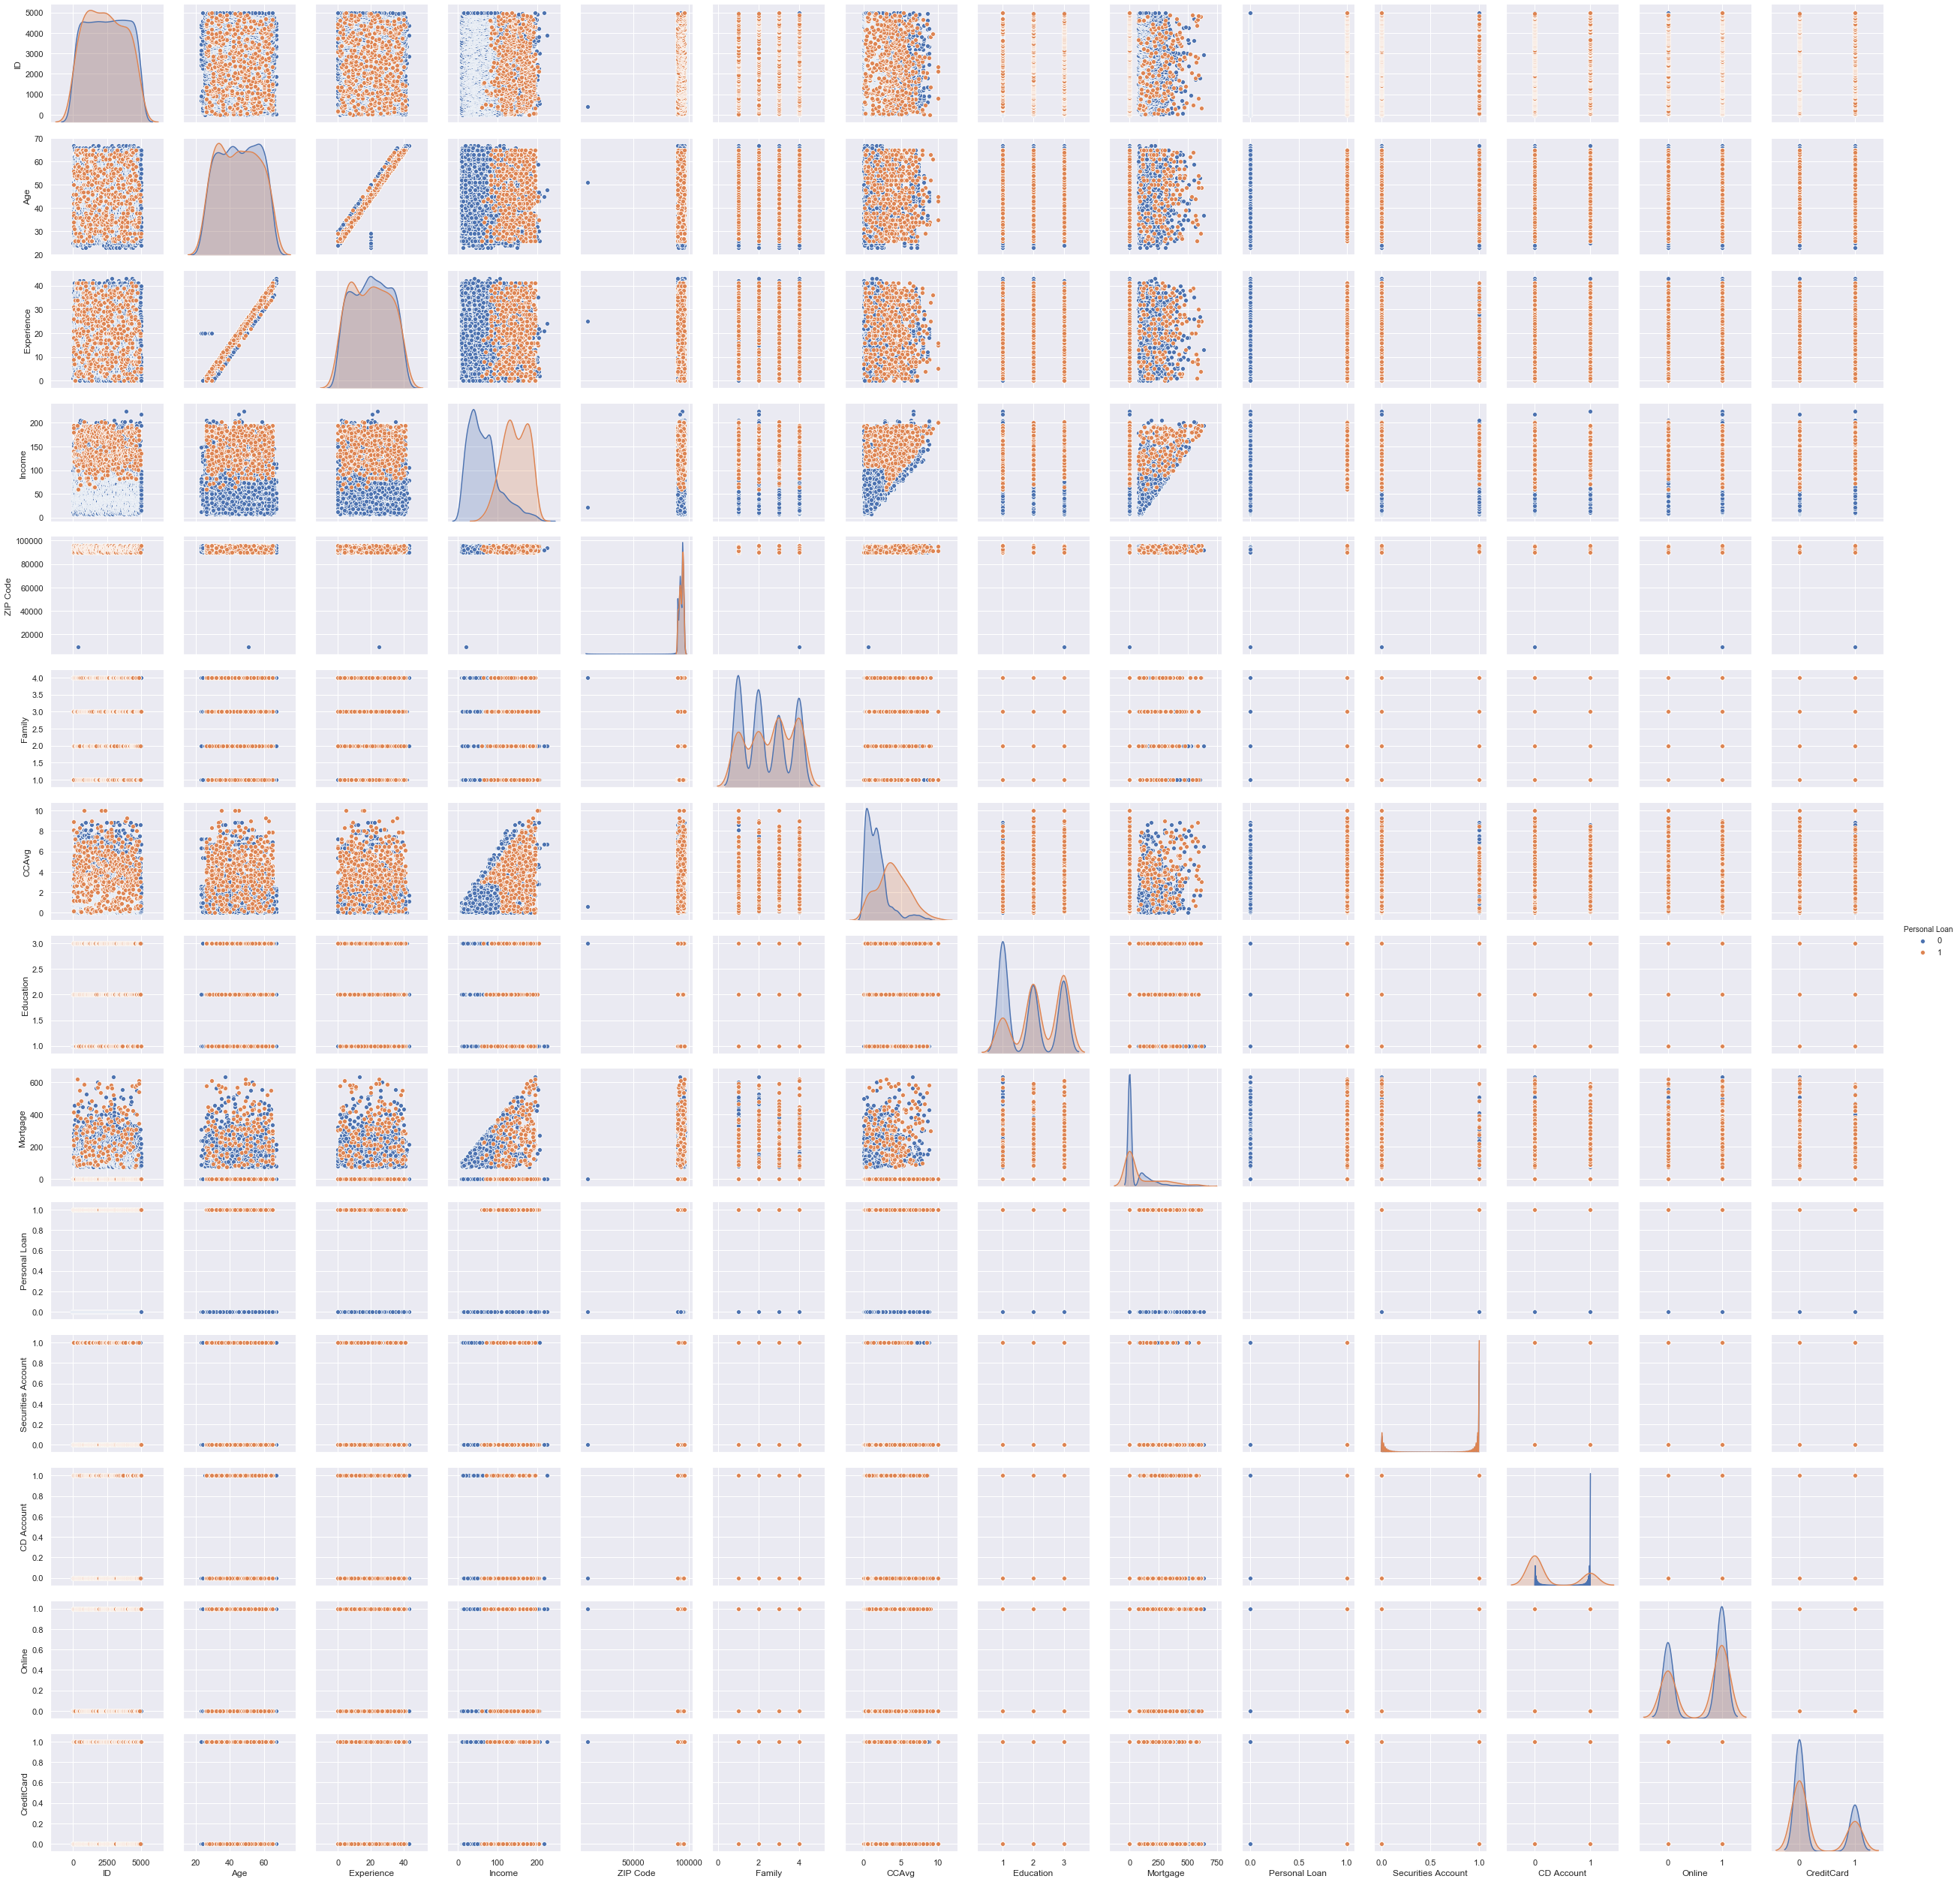

In [404]:
sns.pairplot(df, hue='Personal Loan')

<b>Observations:</b>From the pairplot above we can observe that there could exist a heavy correlation between age and experience and a moderate correlation between income and ccavg. We will try to notice correlations by applying pearson correlations.

<b><h2>Data Processing and Feature Engineering</b>

<b>We will perform following activities under this section:</b><br>
<li> Convert categorical variables to object data-type
<li> Find correlation between variables
<li> Standardization of continous columns

<b>Convert categorical variables to object data-type</b>

In [405]:
Categorical_columns = ['ZIP Code', 'Family',
       'Education','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
df[Categorical_columns] = df[Categorical_columns].astype('object')

In [406]:
df.dtypes

ID                      int64
Age                     int64
Experience            float64
Income                  int64
ZIP Code               object
Family                 object
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

<b>Find correlation between variables</b>

<i>We will be using Pearson correlation

(6.0, 0.0)

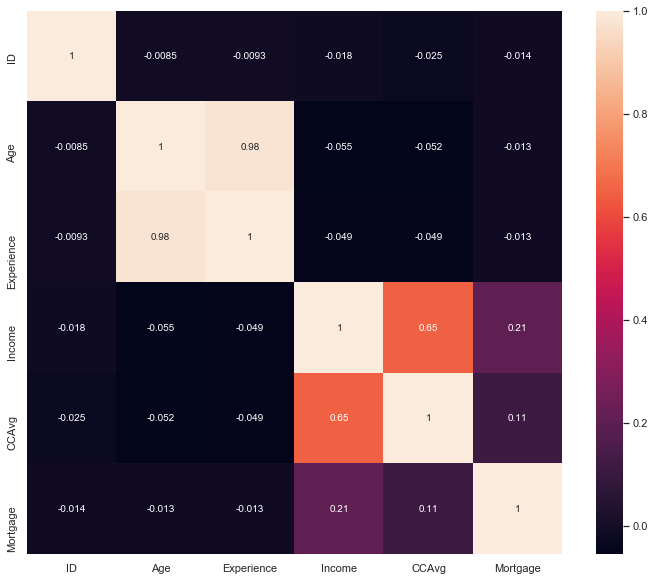

In [407]:
plt.figure(figsize=(12, 10))
df_corr = df.corr(method='pearson')
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<b>Observation:</b> From the above heatmap we can observe a very high positive correlation between Age and Experience. Hence we can drop one of the columns , in this case I will drop Age since it is the first column. Also there is moderate correlation between Income and CCAvg.

<i>Dropping Age from the dataset since it is positively correlated with Experience

In [440]:
df_copy = df.drop(columns=['Age'])

In [441]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
ID                    5000 non-null int64
Experience            5000 non-null float64
Income                5000 non-null int64
ZIP Code              5000 non-null object
Family                5000 non-null object
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null object
Securities Account    5000 non-null object
CD Account            5000 non-null object
Online                5000 non-null object
CreditCard            5000 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 507.9+ KB


In [442]:
df_copy.shape

(5000, 13)

<b>Heatmap after data cleaning</b>

(5.0, 0.0)

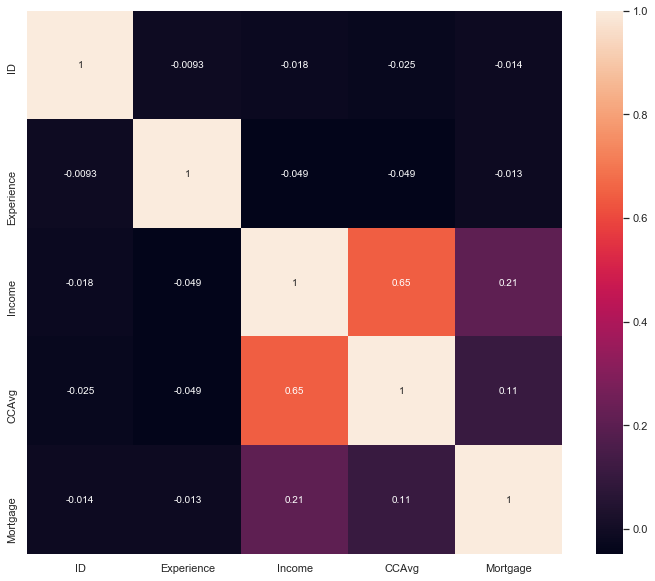

In [443]:
plt.figure(figsize=(12, 10))
df_corr = df_copy.corr(method='pearson')
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<b>Observation:</b>In the above heatmap , we do not have heavily correlated features anymore

In [479]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

<b><h4>Continous Feature Standardization

In [500]:
X = df_copy.copy()
col_names = ['Experience', 'Income', 'CCAvg','Mortgage']
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [501]:
X[col_names] = features

In [502]:
X.head()

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.717717,-0.538229,91107,4,-0.193385,1,-0.555524,0,1,0,0,0
1,2,-0.117989,-0.864109,90089,3,-0.250611,1,-0.555524,0,1,0,0,0
2,3,-0.473484,-1.363793,94720,1,-0.536736,1,-0.555524,0,0,0,0,0
3,4,-1.006727,0.569765,94112,1,0.436091,2,-0.555524,0,0,0,0,0
4,5,-1.095601,-0.625130,91330,4,-0.536736,2,-0.555524,0,0,0,0,1


<b><h2>Model Building

<b>Train Test split(70-30)

In [503]:
y = X['Personal Loan'] #------Target variable-------------#
X = X.drop(columns=['Personal Loan']) #------Features--------#

In [511]:
y = y.astype('int')

In [512]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [513]:
X_train

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1250,1251,-0.029115,0.156983,94301,1,0.418923,2,-0.555524,0,0,1,0
206,207,0.415254,-0.929286,91355,1,-0.536736,1,-0.555524,1,0,1,0
2762,2763,0.948497,-0.190623,93403,2,1.008342,1,-0.555524,0,0,1,0
4276,4277,0.326380,1.764661,92717,1,3.068447,1,-0.555524,0,0,1,1
4802,4803,-0.828979,-0.342700,91330,3,0.493316,1,-0.555524,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2806,-0.740105,2.351246,94523,3,2.210070,3,-0.555524,0,0,1,0
2341,2342,-0.917853,0.374237,92028,1,-0.250611,3,2.286066,0,0,1,0
1585,1586,0.948497,1.243252,90502,2,0.436091,1,-0.555524,0,0,0,0
3152,3153,-0.473484,0.200434,90275,1,-0.536736,3,-0.555524,0,0,0,0


<b>Applying Logistic regression</b>

In [552]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
train_scores = []
test_scores = []
c_val = []
for i in tqdm(range(-2,2,1)):
    model = LogisticRegression(C=pow(10,i))
    model.fit(X_train, y_train)
    
    c_val.append(pow(10,i))
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))
    

100%|██████████| 4/4 [00:00<00:00, 11.43it/s]


In [553]:
max_train_score = max(train_scores)
max_train_pos = train_scores.index(max(train_scores))
max_c_val = c_val[max_train_pos]
print("At C = {} the max train score of the Logisitic regression model = {}".format(max_c_val, max_train_score))

At C = 1 the max train score of the Logisitic regression model = 0.9074285714285715


In [554]:
max_test_score = max(test_scores)
max_test_pos = test_scores.index(max(test_scores))
max_c_val = c_val[max_test_pos]
print("At C = {} the max test score of the Logisitic regression model = {}".format(max_c_val, max_test_score))

At C = 0.01 the max test score of the Logisitic regression model = 0.91


<b>Visualization

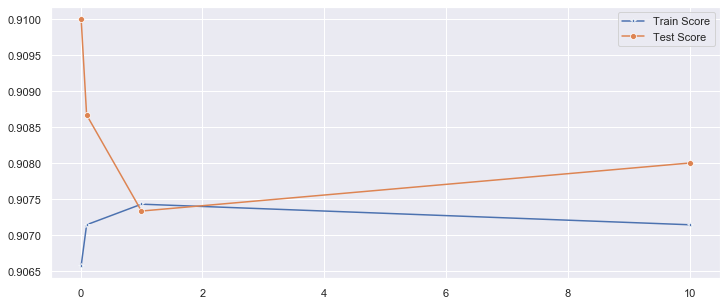

In [555]:
plt.figure(figsize=(12,5))
p = sns.lineplot(c_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(c_val,test_scores,marker='o',label='Test Score')

<b>Observation:</b> From the above plot we can conclude that best model can be fitted at C =  1. Hence we would fit our model on test data with C = 1

In [556]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9073333333333333


<b>Conclusion</b> : The best score of our logistic regression model is 0.907 

<b>Confusion Matrix</b>

Text(0.5, 21.5, 'Predicted label')

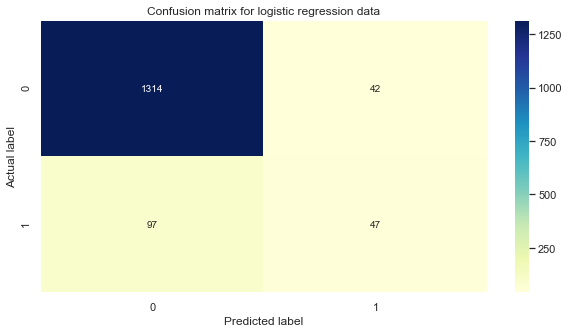

In [557]:
plt.figure(figsize=(10, 5))
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for logistic regression data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [558]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.53      0.33      0.40       144

    accuracy                           0.91      1500
   macro avg       0.73      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500



<b>Conclusion:</b> From above we can conclude that out of total test dataset of 1500 , 1361 were predicted correctly while 139 were predicted wrongly.

<b>Applying K nearest neighbour</b>

In [563]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
train_scores = []
test_scores = []
k_val = []
for i in tqdm(range(1,7)):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    k_val.append(i)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

100%|██████████| 6/6 [00:00<00:00,  7.33it/s]


In [564]:
max_train_score = max(train_scores)
max_train_pos = train_scores.index(max(train_scores))
max_k_val = k_val[max_train_pos]
print("At K = {} the max train score of the K nearest neghbour = {}".format(max_k_val, max_train_score))

At K = 1 the max train score of the K nearest neghbour = 1.0


In [565]:
max_test_score = max(test_scores)
max_test_pos = test_scores.index(max(test_scores))
max_k_val = k_val[max_test_pos]
print("At K = {} the max test score of the K nearest neghbour model = {}".format(max_k_val, max_test_score))

At K = 6 the max test score of the K nearest neghbour model = 0.904


<b>Visualization

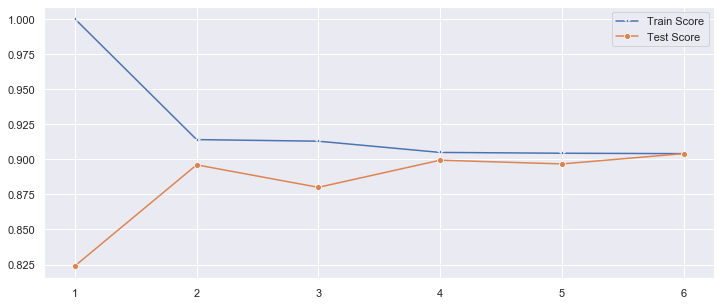

In [566]:
plt.figure(figsize=(12,5))
p = sns.lineplot(k_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(k_val,test_scores,marker='o',label='Test Score')

<b>Observation:</b> From the above plot we can conclude that best model can be fitted at K =  4. Hence we would fit our model on test data with K = 4

In [567]:
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8993333333333333


<b>Conclusion</b> : The best score of our KNN model is 0.899 

<b>Confusion Matrix</b>

Text(0.5, 21.5, 'Predicted label')

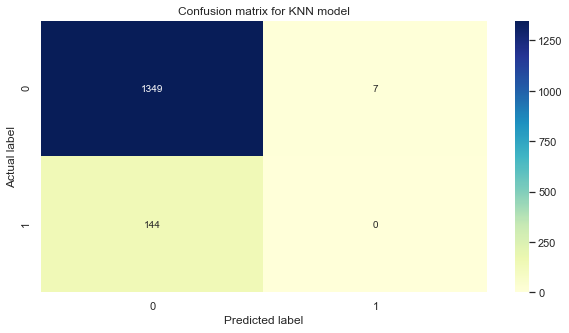

In [568]:
plt.figure(figsize=(10, 5))
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for KNN model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [569]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1356
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500



<b>Conclusion:</b> From above we can conclude that out of total test dataset of 1500 , 1349 were predicted correctly while 151 were predicted wrongly.

<b>Applying Naive Bayes Classification</b>

In [572]:
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
gnb = GaussianNB()
gnb.fit(X_train, y_train)
    

GaussianNB(priors=None, var_smoothing=1e-09)

In [576]:
print("Train score with Gaussian Naive Bayes = {}".format(gnb.score(X_train,y_train)))

Train score with Gaussian Naive Bayes = 0.8874285714285715


In [577]:
print("Test score with Gaussian Naive Bayes = {}".format(gnb.score(X_test,y_test)))

Test score with Gaussian Naive Bayes = 0.8813333333333333


<b>Conclusion</b> : The test score of our Naive Bayes model is 0.881 

<b>Visualization

<b>Confusion Matrix</b>

Text(0.5, 21.5, 'Predicted label')

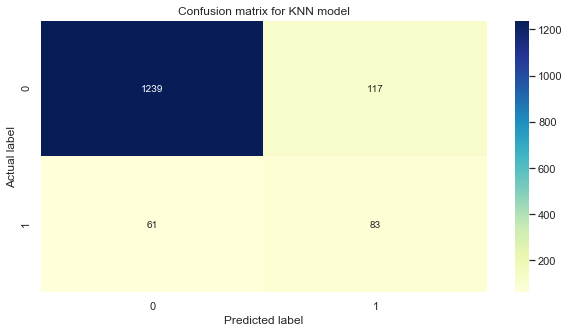

In [578]:
plt.figure(figsize=(10, 5))
y_pred = gnb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for KNN model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [579]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.41      0.58      0.48       144

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



<b>Conclusion:</b> From above we can conclude that out of total test dataset of 1500 , 1322 were predicted correctly while 178 were predicted wrongly.

<b><h3>Comparison of models

<b>Conclusion: </b><li> The dataset is imbalanced since we have more people who did not availed loan in last campaign than people who availed the loan.<li>If we incorrectly predict that a customer would not take a loan and if he does then that would be a loss of opportunity.<li> In such scenarios comparing models based on accuracy might not be a good ides. <li>In this case I would take F1 scores into consideration i.e macro avg score.<li> From the above models we can see that macro F1 of gaussian naive bayes i.e 0.71 is better than the others macro avg scores. Hence, in this scenario I would pick Gaussian naive bayes model over other models